# Final Assessment Scratch Pad

## Instructions

1. Please use only this Jupyter notebook to work on your model, and **do not use any extra files**. If you need to define helper classes or functions, feel free to do so in this notebook.
2. This template is intended to be general, but it may not cover every use case. The sections are given so that it will be easier for us to grade your submission. If your specific use case isn't addressed, **you may add new Markdown or code blocks to this notebook**. However, please **don't delete any existing blocks**.
3. If you don't think a particular section of this template is necessary for your work, **you may skip it**. Be sure to explain clearly why you decided to do so.

## Report

**[TODO]**

Please provide a summary of the ideas and steps that led you to your final model. Someone reading this summary should understand why you chose to approach the problem in a particular way and able to replicate your final model at a high level. Please ensure that your summary is detailed enough to provide an overview of your thought process and approach but also concise enough to be easily understandable. Also, please follow the guidelines given in the `main.ipynb`.

This report should not be longer than **1-2 pages of A4 paper (up to around 1,000 words)**. Marks will be deducted if you do not follow instructions and you include too many words here. 

**[DELETE EVERYTHING FROM THE PREVIOUS TODO TO HERE BEFORE SUBMISSION]**

##### Overview
**[TODO]**

##### 1. Descriptive Analysis
**[TODO]**

##### 2. Detection and Handling of Missing Values
**[TODO]**

##### 3. Detection and Handling of Outliers
**[TODO]**

##### 4. Detection and Handling of Class Imbalance 
**[TODO]**

##### 5. Understanding Relationship Between Variables
**[TODO]**

##### 6. Data Visualization
**[TODO]** 
##### 7. General Preprocessing
**[TODO]**
 
##### 8. Feature Selection 
**[TODO]**

##### 9. Feature Engineering
**[TODO]**

##### 10. Creating Models
**[TODO]**

##### 11. Model Evaluation
**[TODO]**

##### 12. Hyperparameters Search
**[TODO]**

##### Conclusion
**[TODO]**

---

# Workings (Not Graded)

You will do your working below. Note that anything below this section will not be graded, but we might counter-check what you wrote in the report above with your workings to make sure that you actually did what you claimed to have done. 

## Import Packages

Here, we import some packages necessary to run this notebook. In addition, you may import other packages as well. Do note that when submitting your model, you may only use packages that are available in Coursemology (see `main.ipynb`).

In [2]:
import pandas as pd
import os
import numpy as np
from util import show_images, dict_train_test_split

## Load Dataset

The dataset provided is multimodal and contains two components, images and tabular data. The tabular dataset `tabular.csv` contains $N$ entries and $F$ columns, including the target feature. On the other hand, the image dataset `images.npy` is of size $(N, H, W)$, where $N$, $H$, and $W$ correspond to the number of data, image width, and image height, respectively. Each image corresponds to the data in the same index of the tabular dataset. These datasets can be found in the `data/` folder in the given file structure.

A code snippet that loads and displays some of the data is provided below.

### Load Tabular Data

In [3]:
df = pd.read_csv(os.path.join('data', 'tabular.csv'))
print(df.shape)
df.head()

(357699, 61)


V0      V1       V2        V3     V4          V5        V6        V7  \
0   8315.0  1784.0  21994.0   37115.0  317.0  105.016815  296559.0  321602.0   
1   8315.0  1272.0  11114.0   18683.0  230.0         NaN  340059.0  368602.0   
2   8315.0  3832.0  65514.0  147707.0  607.0  105.018240  279159.0  302802.0   
3   8315.0  2296.0  32874.0   55547.0  404.0         NaN  313959.0  340402.0   
4  11021.0  1784.0  21994.0   37115.0  375.0  105.024985  232701.0  252606.0   

       V8  V9  ...  V51  V52        V53  V54  V55   V56   V57  V58  \
0  2470.0  C1  ...   C4   C4   834148.0   C2   C6  1089   293   C2   
1  2820.0  C0  ...   C7   C7   401668.0   C5   C6  9801  1085   C7   
2  2330.0  C1  ...   C7   C7   820948.0   C5   C4  1485   304   C6   
3  2610.0  C1  ...   C7   C7  1664548.0   C5   C5  -495   711   C4   
4  1490.0  C0  ...   C7   C7   735748.0   C2   C9  1683   117   C0   

           V59 target  
0  7428.249334  300.0  
1  9693.829502  200.0  
2  7609.258214   50.0  
3  4258.532609  140.0  
4  9492.484802   20.0  

[5 rows x 61 columns]

### Load Image Data

Shape: (357699, 8, 8)


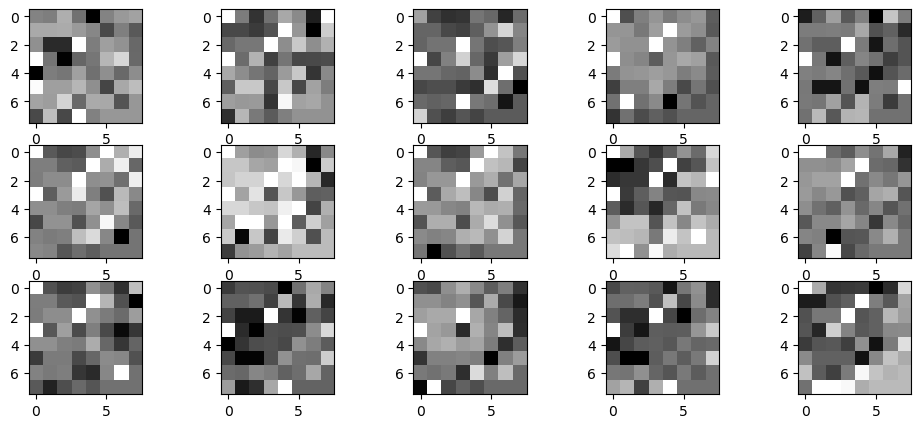

In [4]:
with open(os.path.join('data', 'images.npy'), 'rb') as f:
    images = np.load(f)
    
print('Shape:', images.shape)
show_images(images[:18], n_row=3, n_col=5, figsize=[12,5])

## Data Exploration & Preparation

### 1. Descriptive Analysis

In [5]:
targets = df['target']
print(df.shape)
for column in df:
    if df[column].isna().sum() > 100000:
        print(column, df[column].isna().sum())
# Remove V38, V39, and we can interpolate / remove V5 and V15
# Flatten the images
flattened_images = images.reshape(images.shape[0], -1)
print('shape', flattened_images.shape)
# ID useless columns
for i, col in enumerate(flattened_images.T):
    if (np.isnan(col).sum() > 100000):
        print('nan', i, np.isnan(col).sum())
    if (col == 0).sum() > 100000:
        print('0', i, (col == 0).sum())
# Col 19, 24, 55, 61, 62, 63 are useless
# Interpolate 0 and 12


(357699, 61)
V5 172305
V15 191109
V38 302903
V39 347413
shape (357699, 64)
nan 0 191109
nan 12 172305
nan 19 347413
nan 24 302903
0 55 357699
0 61 357699
0 62 357699
0 63 357699


### 2. Detection and Handling of Missing Values

In [85]:
dropped_columns = ['V38', 'V39', 'target']
df = df.drop(dropped_columns, axis=1)
flattened_images = np.delete(flattened_images, [19, 24,55,61,62,63], axis=1)

KeyError: "['V38', 'V39', 'target'] not found in axis"

In [101]:
print(flattened_images.shape)

(357699, 58)


### 3. Detection and Handling of Outliers

### 4. Detection and Handling of Class Imbalance

### 5. Understanding Relationship Between Variables

### 6. Data Visualization

## Data Preprocessing

### 7. General Preprocessing

### 8. Feature Selection

### 9. Feature Engineering

## Modeling & Evaluation

### 10. Creating models

### 11. Model Evaluation

### 12. Hyperparameters Search